Quais bibliotecas e ferramentas são necessárias para realizar essa análise? Importe essas bibliotecas em um ambiente de desenvolvimento como Google Colab ou Jupyter Notebook.

- pandas para criar e manipular dataFrames, numpy para realizar operaçoes, slkearn para usar funções de vetorizar, nltk para manipula stopword em portugues 

Como podemos transformar os textos brutos em uma forma utilizável para o modelo? Utilize a técnica TfidfVectorizer para converter os textos em uma matriz de características numéricas. Explique por que o pré-processamento é essencial para a análise de texto.

- O pre-processamento ajuda a transforma dados 'brutos' em dados que o modelo entenda, para nao afeta o resultado 

Qual modelo de classificação devemos usar e por quê? Construa um pipeline que integra o pré-processamento de texto e o modelo. Explique a sua escolha de modelo para a tarefa de análise de sentimento.

- O Naive Bayes pois é util para problemas de classificação de texto. Ele funciona bem quando as palavras  são independentes, o que é uma boa aproximação no caso de muitos modelos de texto.

Como treinamos o modelo para que ele aprenda a classificar os comentários? Treine o modelo Naive Bayes usando os dados de treino. Descreva o processo de treinamento e como o modelo aprende a partir dos exemplos rotulados.

- Ele aprende a parti do aprendizado supervisionado, ondem é exposto para o modelo um conjunto de dados para treinamento. O modelo deve a parti de palavras chaves  entender os rotulos pre-definidos.

Como podemos avaliar o desempenho do modelo? Avalie o modelo usando o conjunto de teste e calcule a acurácia. Explique o que a acurácia nos diz sobre a qualidade das previsões do modelo.
- É necessário mostrar para o modelo um conjunto de dados que não foi usado no treinamento. E observar a acuracia (o número de erros e acertos )
Boa prática!

Acurácia: 0.0


<Axes: >

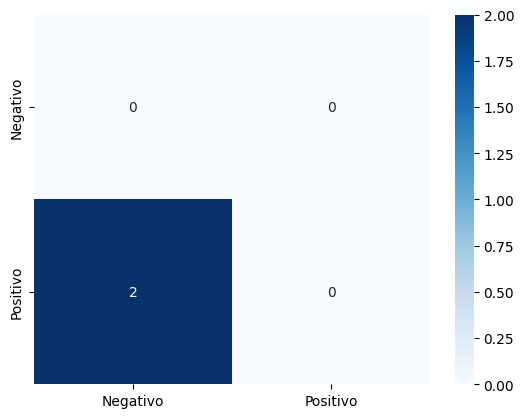

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('portuguese')
# dados
data = pd.DataFrame({
    'comentario': [
        "Eu adorei este produto!", 
        "Este filme é maravilhoso",  
        "Pior experiência de todas",  
        "A comida estava horrível",  
        "Atendimento excelente, voltarei", 
        "Não valeu a pena",  
        "Super recomendo!",  
        "A qualidade é péssima", 
        "Desempenho incrível",  
        "Eu odiei a comida"  
    ],
    'sentimentos': [1, 1, 0, 0, 1, 0, 1, 0, 1, 0]  # 1 = Positivo, 0 = Negativo
})

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(data['comentario'], data['sentimentos'], test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),  # Usando stop_words em português
    ('nb', MultinomialNB())
])

# Treina o modelo com o pipeline
pipeline.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Avalia a acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))



# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True